### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import os
import sys
import datetime

# DATA COLLECTION

### Read Excel input data

In [2]:
df = pd.read_excel(r'data/Data_Train.xlsx')

In [3]:
# Head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Tail
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
# Describe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data = df

# DATA CLEANING

#### # Find the missing value rows; Taken with respect to Route.

In [7]:
# Find the missing value rows; Taken with respect to Route.
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Remove Missing value in Route and Total_Stops

In [8]:
# Remove Missing value in Route and Total_Stops
train_data.dropna(inplace=True)

In [9]:
# Get memory usage of data
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


### Convert Datatype to Datetime for Date, Arrival and Departure Time

In [10]:
train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)

C:\Users\aswinp\AppData\Local\Temp\ipykernel_20512\3674048387.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\aswinp\AppData\Local\Temp\ipykernel_20512\3674048387.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\aswinp\AppData\Local\Temp\ipykernel_20512\3674048387.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

### Add three columns detailing the Journey Data

In [11]:
# Add three columns detailing the Journey Data
train_data['Journey_Year'] = train_data['Date_of_Journey'].dt.year
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  Journey_Year     10682 non-null  int32         
 12  Journey_Month    10682 non-null  int32         
 13  Journey_Day      10682 non-null  int32         
dtypes: datetime64[ns](3), int32(3), int64(1), o

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-08 05:50:00,2024-06-08 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-08 18:05:00,2024-06-08 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-08 16:50:00,2024-06-08 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


### Extract Derived Attributes

In [14]:
# Function to get hour and mins for Departure and Arrival time
def ExtractHoursAndMins(dataframe, col):
    dataframe[col+"_hour"] = dataframe[col].dt.hour
    dataframe[col+"_mins"] = dataframe[col].dt.minute

In [15]:
ExtractHoursAndMins(train_data,"Dep_Time")
ExtractHoursAndMins(train_data,"Arrival_Time")


#### Drop columns which are not necessary

In [16]:
col_delete = ['Dep_Time','Arrival_Time']
train_data.drop(col_delete, axis=1, inplace=True)

### Duration Column Rephrase 

In [17]:
def DurationRephrase(x):
    if 'h' not in x:
        return '0h' + ' ' + x
    elif 'm' not in x:
        return x + ' ' + '0m'
    else:
        return x

In [18]:
train_data_copy = train_data

In [19]:
#train_data = train_data_copy
train_data['Duration'] = train_data['Duration'].apply(DurationRephrase)
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,2019,6,24,9,0,11,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,2019,3,12,18,55,10,25
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,2019,3,1,8,0,5,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,2019,3,12,8,55,10,25
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,2019,5,27,11,25,19,15


### Add Duration Hours and Minutes column

In [30]:
train_data['Duration_Hours'] = train_data['Duration'].apply(lambda x:x.split()[0][:-1])
train_data['Duration_Minutes'] = train_data['Duration'].apply(lambda x:x.split()[1][:-1])
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35,4,45
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,2019,6,24,9,0,11,25,2,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,2019,3,12,18,55,10,25,15,30
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,2019,3,1,8,0,5,5,21,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,2019,3,12,8,55,10,25,25,30
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,2019,5,27,11,25,19,15,7,50


### Column for Total Duration in Mins only

In [41]:
train_data['Duration_Hours'] = train_data['Duration_Hours'].astype(int)
train_data['Duration_Minutes'] = train_data['Duration_Minutes'].astype(int)

In [43]:
train_data['Duration_Total_Minutes'] = train_data['Duration_Hours']*60 + train_data['Duration_Minutes']

# DATA ANALYSIS

### Analysis - When does most of the flight take off?

In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35


In [22]:
def GetTimeCategory(val):
    if val>4 and val<8:
        return 'Early_Morning'
    elif val>8 and val<12:
        return 'Morning'
    elif val>12 and val<16:
        return 'Afternoon'
    elif val>16 and val<20:
        return 'Evening'
    elif val>20 and val<24:
        return 'Night'
    else:
        return 'Late_Night'

<Axes: xlabel='Dep_Time_hour'>

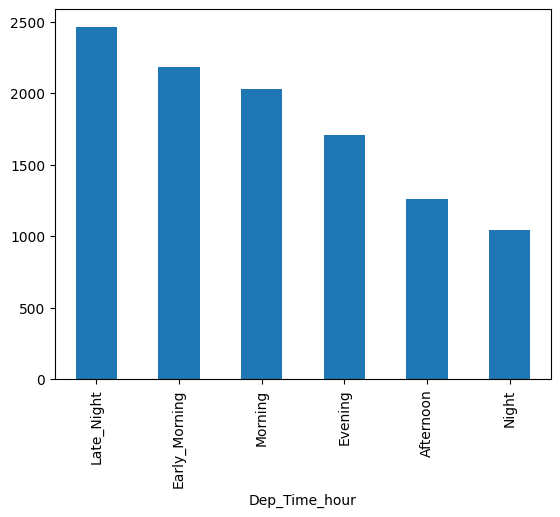

In [23]:
train_data['Dep_Time_hour'].apply(GetTimeCategory).value_counts().plot(kind='bar')

#### We can infer that most number of flights depart at Late Night or Early Morning

### Analysis - Does Duration and Stops have an impact on Price?

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

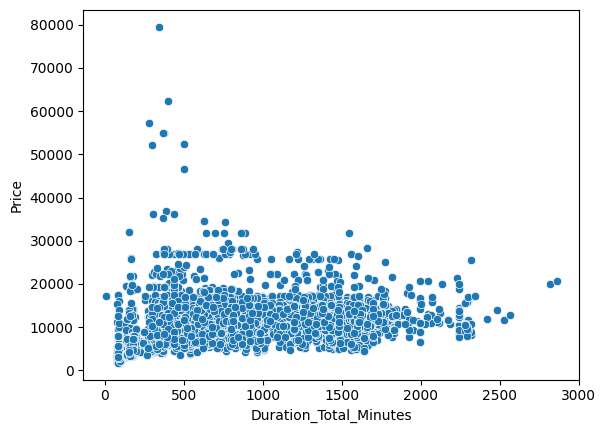

In [46]:
sns.scatterplot(x='Duration_Total_Minutes',y='Price',data=train_data)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

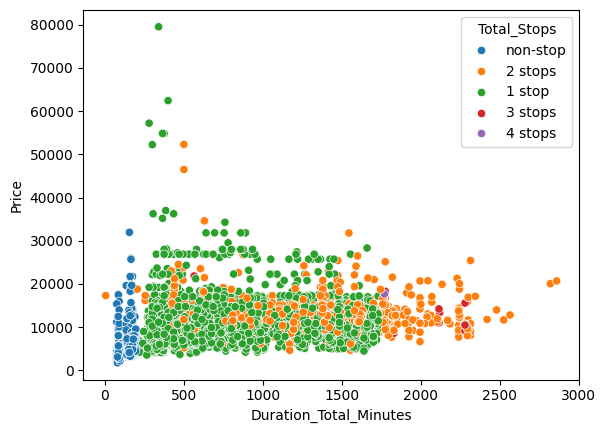

In [47]:
sns.scatterplot(x='Duration_Total_Minutes',y='Price',data=train_data,hue='Total_Stops')

#### Regression Plot

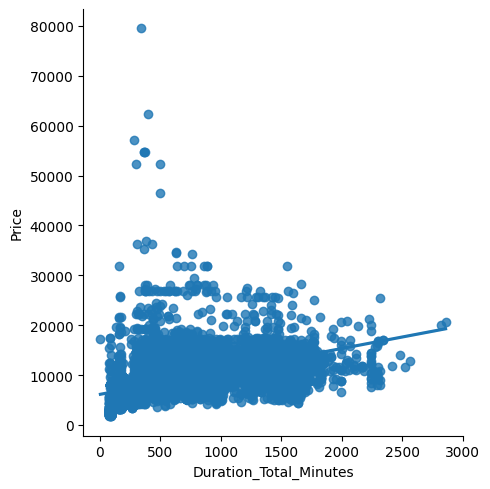

In [48]:
sns.lmplot(x='Duration_Total_Minutes',y='Price',data=train_data)

#### Slope is almost 0.6. So we can infer that with a increase of 100mins duration, price increase can be 60units

### Analysis - In which route Jet Airways is extremely used?

In [54]:
train_data[train_data['Airline'] == 'Jet Airways']['Route'].value_counts()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

### Analysis - Price variation among Airlines
#### This is done by using Box plots - It gives whiskers(lowest and highest points), 25% value, 50% value(median), 75% value. So between 25 and 75, 50% of the datapoints lie.

C:\Users\aswinp\AppData\Local\Temp\ipykernel_20512\2929317608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Airline', y='Price', data=train_data,palette='Set2')


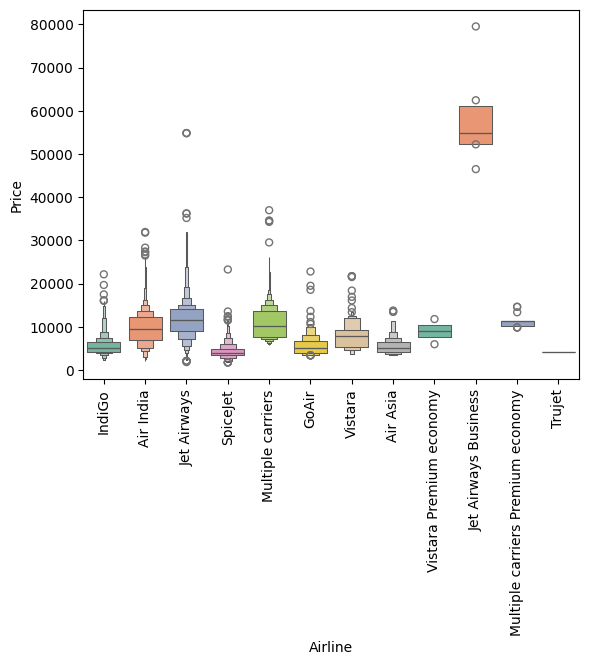

In [65]:
sns.boxenplot(x='Airline', y='Price', data=train_data,palette='Set2')
plt.xticks(rotation=90)
plt.show()

# FEATURE ENGINEERING
#### Since ML Alogrithms only understands numbers and vectors. We have to convert our Categorical features to Numerical features. One method of Feature engineering is FEATURE ENCODING
#### Nominal Data - Data which doesn't have any order. Here in this coloumns like source and destination doesn't have any order. 
#### Ordinal Data - Data which follows some kind of order. Here column like Stops follows an order like zero, 1, 2 etc.
#### Rule of Thumb - For Nominal data - ONE-HOT-ENCODING method is used for Feature Encoding
#### For Ordinal Data - LABEL ENCODING menthod is used